In [1]:
import ROOT
import numpy as np
import pandas as pd
import my_library.gluex_style as gs

Welcome to JupyROOT 6.24/04


In [50]:
gluex_colors = {
    8: ROOT.kRed+1,
    9: ROOT.kBlue+1,
    10: ROOT.kMagenta+2,
    11: ROOT.kCyan+3
}

theory_colors = {
    8: ROOT.kRed-6,
    9: ROOT.kBlue-6,
    10: ROOT.kMagenta-6,
    11: ROOT.kCyan-6
}

clas_colors = {
    2.45: ROOT.kRed+3,
    2.55: ROOT.kBlue+3,
    2.65: ROOT.kMagenta+3,
    2.75: ROOT.kCyan+4,
}

gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

clas_markers = {
    2.45: ROOT.kOpenDiamond,
    2.55: ROOT.kOpenSquare,
    2.65: ROOT.kOpenTriangleUp,
    2.75: ROOT.kOpenCircle
}

theory_markers = {
    8: ROOT.kFullDotLarge,
    9: ROOT.kFullDotLarge,
    10: ROOT.kOpenTriangleUp,
    11: ROOT.kOpenDiamond
}

In [51]:
binned_fit_results_filename = f'/work/halld/home/viducic/data/fit_params/pipkmks/cross_section_values.csv'

df = pd.read_csv(binned_fit_results_filename)
df = df[df.beam_energy > 7]

In [52]:
clas_filename = '/work/halld/home/viducic/scripts/plotting/dnp_maui/clas_data.csv'
clas_df = pd.read_csv(clas_filename)
for complex_col in ["t", "dsigma_dt", "clas_error", "error_t"]:
    clas_df[complex_col] = clas_df[complex_col].apply(lambda x: x[1:-5])
for col in clas_df.columns:
    clas_df[col] = clas_df[col].astype('Float64')
# clas_df['error_t'] = clas_df['clas_error'].apply(lambda x: abs(x))
clas_df = clas_df[clas_df['t'] < 1.9]
clas_df = clas_df[clas_df['w'] >= 2.45]
clas_300 = clas_df[(clas_df['w'] == 2.55)]
clas_325 = clas_df[(clas_df['w'] == 2.65)]
clas_350 = clas_df[(clas_df['w'] == 2.75)]

In [53]:
print(clas_df.to_markdown())

|    |   Unnamed: 0 |    w |   cosThetaCM |   e_gam |        t |   dsigma_domega |   dsigma_dt |   clas_error |   error_t |
|---:|-------------:|-----:|-------------:|--------:|---------:|----------------:|------------:|-------------:|----------:|
| 10 |           10 | 2.45 |        -0.5  | 2.72957 | 1.77135  |            6.42 |    40.2072  |     1.22674  |   7.68286 |
| 11 |           11 | 2.45 |        -0.3  | 2.72957 | 1.55831  |            6.39 |    40.0193  |     1.46263  |   9.1602  |
| 12 |           12 | 2.45 |        -0.1  | 2.72957 | 1.34528  |            5.73 |    35.8859  |     0.890449 |   5.57671 |
| 13 |           13 | 2.45 |         0.1  | 2.72957 | 1.13224  |            7.29 |    45.6559  |     1.16276  |   7.28211 |
| 14 |           14 | 2.45 |         0.3  | 2.72957 | 0.9192   |            8.1  |    50.7287  |     2.04978  |  12.8374  |
| 15 |           15 | 2.45 |         0.5  | 2.72957 | 0.706161 |            6.58 |    41.2093  |     1.31529  |   8.23744 |
| 16 |  

In [54]:
print(df.columns)

Index(['mean', 'mean_error', 'width', 'width_error', 'chi2ndf', 'ks_test',
       'yield', 'yield_error', 'acceptance', 'acceptance_error',
       'cross_section', 'cross_section_error', 't_bin_middle', 't_bin_width',
       'beam_energy'],
      dtype='object')


In [55]:
grouped = df.groupby('beam_energy')
clas_grouped = clas_df.groupby('w')

In [56]:
graphs = []
legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
comparison_legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
for beam_energy, group in grouped:
    if beam_energy > 9:
        continue
    graph = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cross_section_error.to_numpy())
    graph.SetName(f'graph_{beam_energy}')
    graph.SetMarkerColor(gluex_colors[beam_energy])
    graph.SetMarkerStyle(gluex_markers[beam_energy])
    if beam_energy == 11:
        graph.SetMarkerSize(2.0)
    else:
        graph.SetMarkerSize(1.5)
    graph.SetLineColor(gluex_colors[beam_energy])
    graph.SetLineWidth(2)
    graph.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph.GetYaxis().SetTitleSize(0.05)
    graph.GetXaxis().SetTitleSize(0.05)
    graph.GetYaxis().SetTitleOffset(0.9)
    graph.GetXaxis().SetTitleOffset(0.9)
    legend.AddEntry(graph, 'E_{#gamma} = ' + f'{beam_energy} GeV', 'lfp')
    comparison_legend.AddEntry(graph, 'E_{#gamma} = ' + f'{beam_energy} GeV', 'lfp')
    graphs.append(graph)

In [57]:
clas_graphs = []
for w, group in clas_grouped:
    clas_graph = ROOT.TGraphErrors(len(group.t.to_numpy()), group.t.to_numpy(), group.dsigma_dt.to_numpy(), np.zeros(len(group.t.to_numpy())), group.error_t.to_numpy())
    clas_graph.SetName(f'clas_graph_{w}')
    clas_graph.SetMarkerColor(clas_colors[w])
    clas_graph.SetMarkerStyle(clas_markers[w])
    clas_graph.SetLineColor(clas_colors[w])
    clas_graph.SetLineWidth(2)
    clas_graph.GetXaxis().SetTitle('-t [GeV^{2}]')
    clas_graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    clas_graph.GetYaxis().SetTitleSize(0.05)
    clas_graph.GetXaxis().SetTitleSize(0.05)
    clas_graph.GetYaxis().SetTitleOffset(0.9)
    clas_graph.GetXaxis().SetTitleOffset(0.9)
    comparison_legend.AddEntry(clas_graph, 'E_{#gamma} = ' + '{:.2f} GeV'.format(group['e_gam'].values[0]), 'lfp')
    clas_graphs.append(clas_graph)

In [58]:
theory_graphs = []

for beam in [8, 9, 10, 11]:
    theory_filename = '/work/halld/home/viducic/theory_predictions/t-slope-{}GeVnew.dat'
    theory_df = pd.read_csv(theory_filename.format(beam), delim_whitespace=True)
    theory_df.columns = ['t', 'diff_cs']
    theory_df = theory_df.loc[(theory_df['t'] > 0.1) & (theory_df['t'] < 1.9)]
    theory_graph = ROOT.TGraph(len(theory_df.t.to_numpy()), theory_df.t.to_numpy(), theory_df.diff_cs.to_numpy())
    theory_graph.SetName(f'theory_graph_{beam}')
    theory_graph.SetMarkerColor(theory_colors[beam])
    theory_graph.SetMarkerStyle(theory_markers[beam])
    theory_graph.SetMarkerSize(1.0)
    theory_graphs.append(theory_graph)


theory_filename = '/work/halld/home/viducic/theory_predictions/t-slope-{}GeVnew.dat'
theory_df = pd.read_csv(theory_filename.format(beam), delim_whitespace=True)
theory_df.columns = ['t', 'diff_cs']
theory_df = theory_df.loc[(theory_df['t'] > 0.1) & (theory_df['t'] < 1.9)]

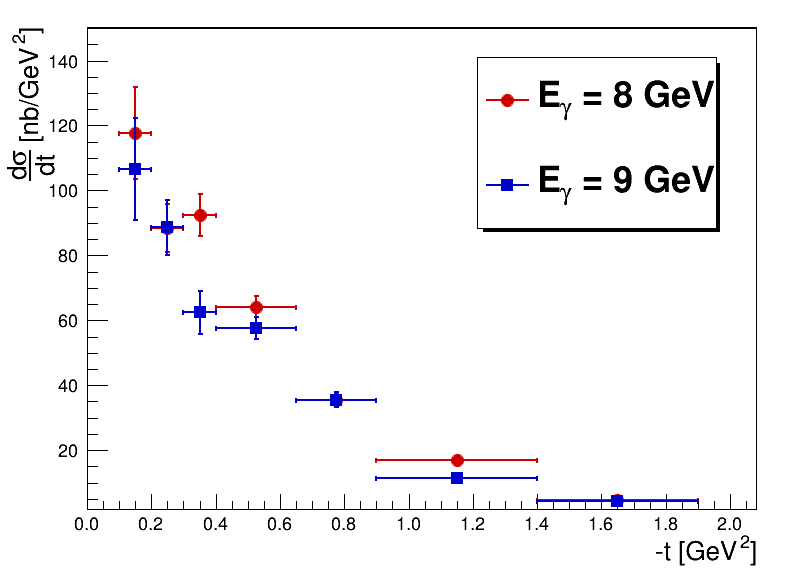

In [59]:
c = ROOT.TCanvas()
# c.SetLogy()

graphs[0].Draw('AP')
graphs[0].GetYaxis().SetRangeUser(2, 150)
for graph in graphs[1:]:
    graph.Draw('P')
legend.Draw()
c.Draw()

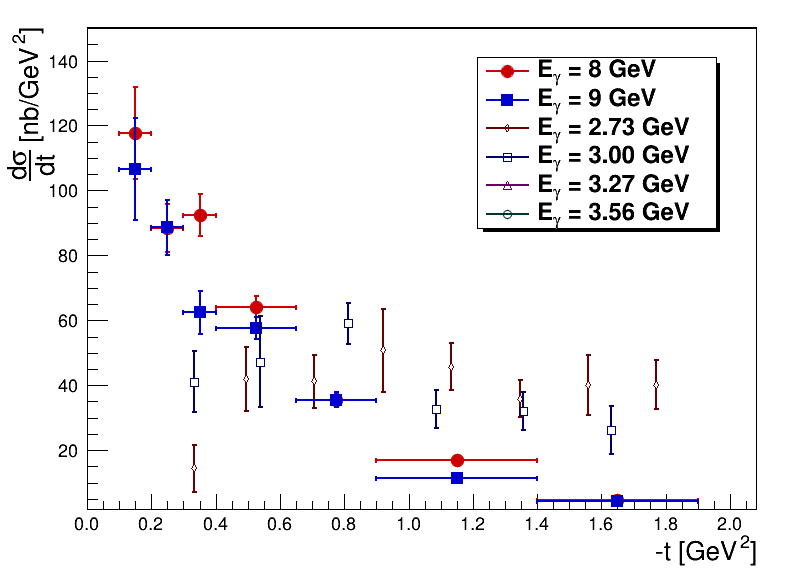

In [60]:
c.Clear()
# c.SetLogy()

graphs[0].Draw('AP')
graphs[0].GetYaxis().SetRangeUser(2, 150)

for gluex, clas in zip(graphs, clas_graphs):
    gluex.Draw('P')
    clas.Draw('P')
comparison_legend.Draw()
c.Draw()

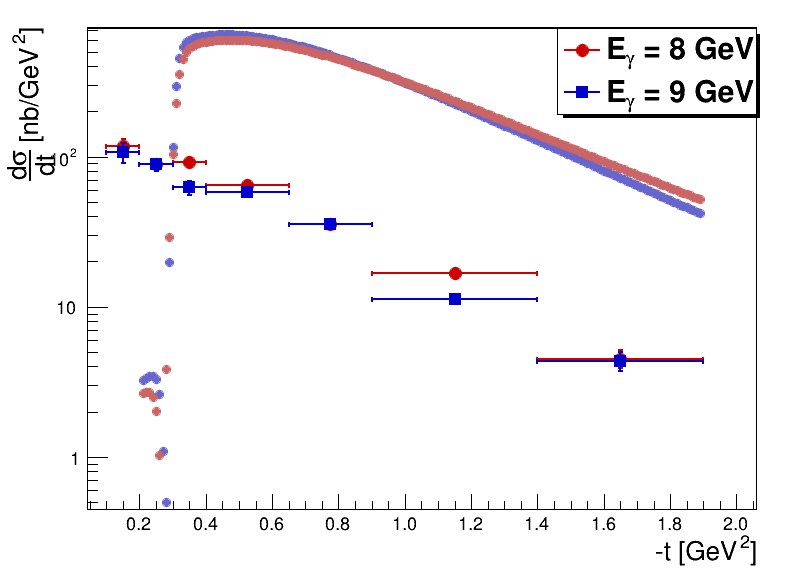

In [72]:
c.Clear()
c.SetLogy()

result_legend = ROOT.TLegend(0.7, 0.8, 0.95, 0.95)
result_legend.AddEntry(graphs[0], 'E_{#gamma} = 8 GeV', 'lfp')
result_legend.AddEntry(graphs[1], 'E_{#gamma} = 9 GeV', 'lfp')
# result_legend.AddEntry(clas_graphs[0], ' CLAS - E_{#gamma} = 2.72 GeV', 'lfp')
# result_legend.AddEntry(clas_graphs[1], ' CLAS - E_{#gamma} = 3.0 GeV', 'lfp')
# result_legend.AddEntry(clas_graphs[2], ' CLAS - E_{#gamma} = 3.27 GeV', 'lfp')
# result_legend.AddEntry(clas_graphs[3], ' CLAS - E_{#gamma} = 3.56 GeV', 'lfp')
# result_legend.AddEntry(theory_graphs[0], 'Theory - E_{#gamma} = 8 GeV', 'lfp')
# result_legend.AddEntry(theory_graphs[1], 'Theory - E_{#gamma} = 9 GeV', 'lfp')

theory_graphs[1].GetXaxis().SetTitle('-t [GeV^{2}]')
theory_graphs[1].GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
theory_graphs[1].GetYaxis().SetTitleSize(0.05)
theory_graphs[1].GetXaxis().SetTitleSize(0.05)
theory_graphs[1].GetYaxis().SetTitleOffset(0.9)
theory_graphs[1].GetXaxis().SetTitleOffset(0.9)

theory_graphs[1].Draw('AP')
theory_graphs[0].Draw('P')
graphs[0].Draw('P')
graphs[1].Draw('P')
# clas_graphs[0].Draw('P')
# clas_graphs[1].Draw('P')
# clas_graphs[2].Draw('P')
# clas_graphs[3].Draw('P')
result_legend.Draw()
c.Draw()


In [62]:
# TODO: fit for slopes quickly